# **Homework-1**

### **Name:** Pavan Pandya

### **Email:** pnpandya@iu.edu

### **Import Libraries**

In [3]:
!pip install torch==1.13.0 torchvision==0.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.1/890.1 MB 1.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 12.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 70.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.4.0
    Uninstalling torch-2.4.0:
      Successfully uninstalled torch-2.4.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.0
    Uninstalling torchvision-0.19.0:
      Successfully uninstalled torchvision-0.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [5]:
torch.__version__

'1.13.0+cu117'

In [6]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
# Define transformations for the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [8]:
# Load MNIST datasets
train_dataset = torchvision.datasets.MNIST(root='mnist', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='mnist', train=False, download=True, transform=transform)

# Prepare DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



## **Problem-1: Softmax MNIST Classification**

In [7]:
p1_train_loader = train_loader
p1_test_loader = test_loader

In [8]:
# Set manual seed for reproducibility  
torch.manual_seed(142)

# Initialize weights using nn.Parameter to ensure gradients are tracked
weights = torch.nn.Parameter(torch.randn(10, 28*28) * 0.001, requires_grad=True)

In [9]:
# Training and test accuracy lists
nf_test_accuracy = []
weights_20_epoch = None
weights_200_epoch = None
num_epochs = 200
learning_rate = 0.01
optimizer = torch.optim.SGD([weights], lr=learning_rate)

In [10]:
# Train the model and save weights at specified epochs
for epoch in range(num_epochs):
    correct_test = 0
    total_test = 0

    for images, labels in p1_train_loader:
        images_flattened = images.view(-1, 28*28)

        # Forward pass: compute logits
        logits = images_flattened @ weights.T
        
        # Compute loss using F.cross_entropy (logits are passed directly)
        loss = nn.functional.cross_entropy(logits, labels)

        # Zero the gradients
        optimizer.zero_grad()

        # Backward pass: compute gradients
        loss.backward()

        # Update weights using optimizer
        optimizer.step()

    # Save weights after 20 and 200 epochs for visualization
    if epoch == 19:
        weights_20_epoch = weights.detach().clone()
    if epoch == 199:
        weights_200_epoch = weights.detach().clone()

    # Compute Test Accuracy
    with torch.no_grad():
        for images, labels in p1_test_loader:
            images_flattened = images.view(-1, 28*28)
            logits = images_flattened @ weights.T
            predictions = nn.functional.softmax(logits, dim=1)
            _, predicted_labels = torch.max(predictions.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted_labels == labels).sum().item()

    accuracy = 100 * correct_test / total_test
    nf_test_accuracy.append(accuracy)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Accuracy: {accuracy:.4f}")

Epoch [10/200], Accuracy: 92.3000
Epoch [20/200], Accuracy: 92.3200
Epoch [30/200], Accuracy: 92.4400
Epoch [40/200], Accuracy: 92.5300
Epoch [50/200], Accuracy: 92.5900
Epoch [60/200], Accuracy: 92.3900
Epoch [70/200], Accuracy: 92.5800
Epoch [80/200], Accuracy: 92.5400
Epoch [90/200], Accuracy: 92.5700
Epoch [100/200], Accuracy: 92.6300
Epoch [110/200], Accuracy: 92.5200
Epoch [120/200], Accuracy: 92.5500
Epoch [130/200], Accuracy: 92.6600
Epoch [140/200], Accuracy: 92.6700
Epoch [150/200], Accuracy: 92.6600
Epoch [160/200], Accuracy: 92.5300
Epoch [170/200], Accuracy: 92.5800
Epoch [180/200], Accuracy: 92.5900
Epoch [190/200], Accuracy: 92.5700
Epoch [200/200], Accuracy: 92.5600


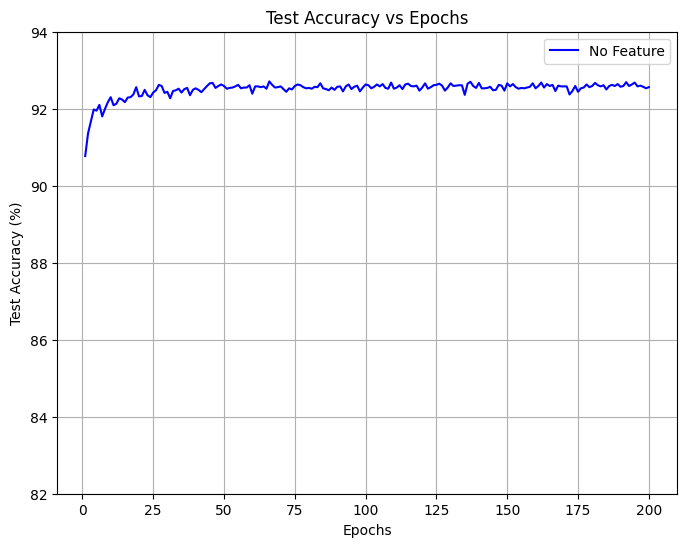

In [11]:
# Plot the test accuracy vs epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(nf_test_accuracy) + 1), nf_test_accuracy, label='No Feature', color='b')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.yticks([82, 84, 86, 88, 90, 92, 94])
plt.title('Test Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
def plot_weights(weights, title, rows, cols):
    """Function to generate a plot of weights."""
    plt.figure()
    plt.suptitle(title)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(weights[i].reshape(28, 28), cmap='viridis')
        plt.axis('off')
    plt.show()

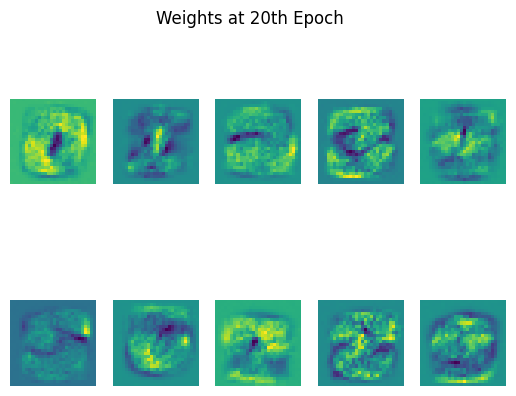

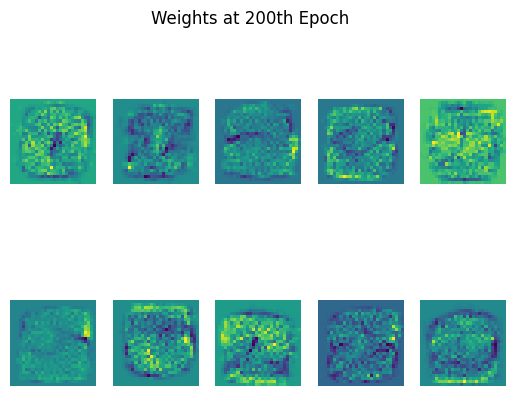

In [13]:
# Generate weight plots
plot_weights(weights_20_epoch, "Weights at 20th Epoch", 2, 5)
plot_weights(weights_200_epoch, "Weights at 200th Epoch", 2, 5)

In [14]:
# After training, save the model's parameters
model_state = {
    'weights': weights,
    'epoch': num_epochs,  
    'test_accuracy': nf_test_accuracy  
}

torch.save(model_state, 'softmax_mnist_model.pth')  # Save the model to a file

## **Problem-2: Autoencoders**

In [9]:
# Define the Autoencoder Model
class Autoencoder(nn.Module):
    def __init__(self, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, encoding_dim),
            nn.Sigmoid()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 784)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

In [10]:
# Define Classifier Model with frozen encoder weights
class Classifier(nn.Module):
    def __init__(self, encoder):
        super(Classifier, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(encoder.encoder[0].out_features, 100)
        self.hidden.weight.data = encoder.encoder[0].weight.data.clone()  # Copy encoder weights
        self.hidden.bias.data.zero_()  # Set biases to zero
        self.hidden.requires_grad = False  # Freeze weights of the hidden layer
        self.output = nn.Linear(100, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = torch.softmax(self.output(x), dim=1)
        return x

In [11]:
# Evaluate function for the Autoencoder (using MSE)
def evaluate_autoencoder(model, test_loader, device):
    model.eval()
    total_loss = 0.0
    total_samples = 0

    with torch.no_grad():
        for images, _ in test_loader:
            images = images.to(device)
            reconstructed, _ = model(images)
            loss = F.mse_loss(reconstructed, images, reduction='sum')
            total_loss += loss.item()
            total_samples += images.size(0)

    average_loss = total_loss / total_samples
    return average_loss

In [12]:
# Train function for Autoencoder
def train_autoencoder(model, train_loader, optimizer, criterion, device, num_epochs=200):
    model.to(device)
    losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, _ in train_loader:
            images = images.to(device)
            images = images.view(images.size(0), -1)  # Flatten the images to (batch_size, 784)

            optimizer.zero_grad()  # Reset gradients

            # Forward pass
            reconstructed, _ = model(images)
            loss = criterion(reconstructed, images)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        average_loss = running_loss / len(train_loader)
        losses.append(average_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}')

    return losses

In [13]:
# Evaluate function for the Classifier
def evaluate_classifier(model, test_loader, device):
    model.eval()
    total_samples = 0
    correct_predictions = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

    accuracy = 100 * correct_predictions / total_samples
    return accuracy

In [14]:
def train_classifier(model, train_loader, test_loader, autoencoder, optimizer, criterion, device, num_epochs=200):
    accuracy_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()  # Reset gradients

            # Get the encoded features from the autoencoder
            with torch.no_grad():
                encoded_features, _ = autoencoder(images.view(images.size(0), -1))  # Flatten and encode

            # Forward pass through the classifier
            outputs = model(encoded_features)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Evaluate model after each epoch
        test_accuracy = evaluate_classifier(model, test_loader, device)
        accuracy_list.append(test_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

    return accuracy_list

In [15]:
# Function to visualize encoder weights
def visualize_encoder_weights(model, num_samples=20):
    encoder_layers = model.encoder
    weights = encoder_layers[0].weight.data.cpu().numpy()

    # If weights are more than num_samples, take a subset
    if weights.shape[0] > num_samples:
        weights = weights[:num_samples]

    # Plot the weights
    plt.figure(figsize=(20, 4))
    for i in range(weights.shape[0]):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(weights[i].reshape(28, 28), cmap='viridis')  # Reshape if necessary
        plt.axis('off')
    plt.suptitle('Encoder Weights Visualization')
    plt.show()

In [16]:
# Function to visualize hidden layer activations
def visualize_hidden_activations(model, data_loader, num_samples=150, num_units=100):
    model.eval()
    activations = []

    with torch.no_grad():
        for images, _ in data_loader:
            images = images.to(device)
            # Ensure images are flattened before passing to the autoencoder
            images_flattened = images.view(images.size(0), -1)  # Flatten the images
            _, encoded = model(images_flattened)
            activations.append(encoded.cpu().numpy())
            if len(activations) * data_loader.batch_size >= num_samples:
                break

    # Concatenate activations and take only the first 'num_samples'
    activations = np.concatenate(activations, axis=0)[:num_samples]

    plt.figure(figsize=(12, 6))
    plt.imshow(activations.T, aspect='auto', cmap='viridis')
    plt.colorbar(label='Activation value')
    plt.ylabel('Hidden Units')  
    plt.xlabel('Samples')         
    plt.title('Hidden Layer Activations')
    plt.xticks(np.arange(0, num_samples, step=10))
    plt.yticks(np.arange(0, num_units, step=10))
    plt.show()

In [17]:
# Function to visualize original and reconstructed images
def visualize_original_reconstructed(model, data_loader, num_images=20):
    model.eval()
    images_list = []
    reconstructed_list = []

    with torch.no_grad():
        for images, _ in data_loader:
            images = images.to(device)
            # Flatten the images before passing them to the model
            images_flattened = images.view(images.size(0), -1)  # Flatten the images
            reconstructed, _ = model(images_flattened)
            images_list.append(images.cpu().numpy())
            reconstructed_list.append(reconstructed.cpu().numpy())
            if len(images_list) * data_loader.batch_size >= num_images:
                break

    # Concatenate images and reconstructed outputs
    original_images = np.concatenate(images_list, axis=0)[:num_images]
    reconstructed_images = np.concatenate(reconstructed_list, axis=0)[:num_images]

    # Plot original images
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[i].reshape(28, 28), cmap='viridis')
        plt.axis('off')
    plt.title('Original Images')

    # Plot reconstructed images
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='viridis')
        plt.axis('off')
    plt.title('Reconstructed Images')

    plt.show()

### **Naive Autoencoder**

In [18]:
# Load MNIST dataset
p2_naive_train_loader = train_loader
p2_naive_test_loader = test_loader

In [19]:
# Initialize Autoencoder
naive_autoencoder_model = Autoencoder(encoding_dim=100).to(device)
autoencoder_optimizer = optim.SGD(naive_autoencoder_model.parameters(), lr=0.01)
criterion = nn.MSELoss()

In [20]:
# Train Autoencoder
naive_ae_loss = train_autoencoder(naive_autoencoder_model, p2_naive_train_loader, autoencoder_optimizer, criterion, device)

Epoch [10/200], Loss: 0.6193
Epoch [20/200], Loss: 0.5239
Epoch [30/200], Loss: 0.4643
Epoch [40/200], Loss: 0.4256
Epoch [50/200], Loss: 0.3969
Epoch [60/200], Loss: 0.3738
Epoch [70/200], Loss: 0.3544
Epoch [80/200], Loss: 0.3378
Epoch [90/200], Loss: 0.3234
Epoch [100/200], Loss: 0.3108
Epoch [110/200], Loss: 0.2997
Epoch [120/200], Loss: 0.2897
Epoch [130/200], Loss: 0.2807
Epoch [140/200], Loss: 0.2725
Epoch [150/200], Loss: 0.2649
Epoch [160/200], Loss: 0.2579
Epoch [170/200], Loss: 0.2515
Epoch [180/200], Loss: 0.2455
Epoch [190/200], Loss: 0.2399
Epoch [200/200], Loss: 0.2348


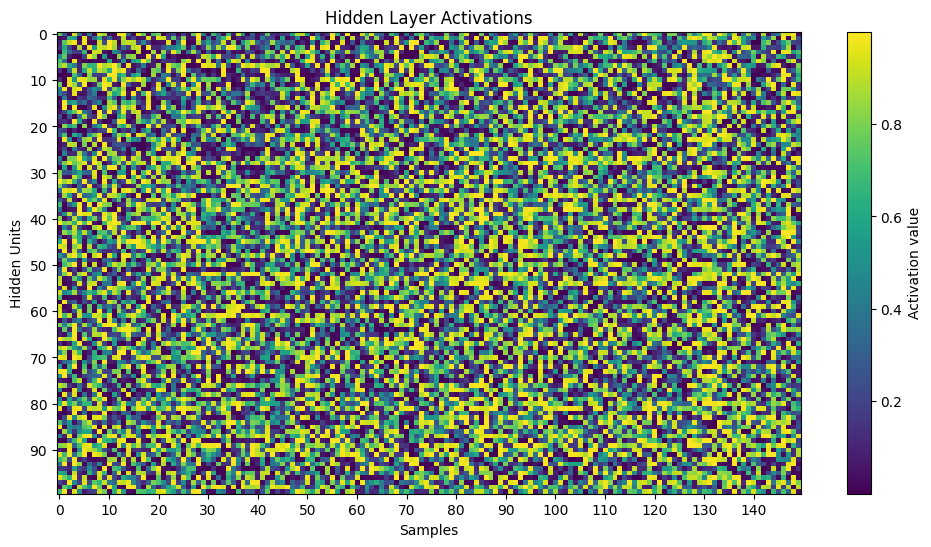

In [21]:
# Visualize the hidden layer activations from the autoencoder
visualize_hidden_activations(naive_autoencoder_model, p2_naive_test_loader, num_samples=150, num_units=100)

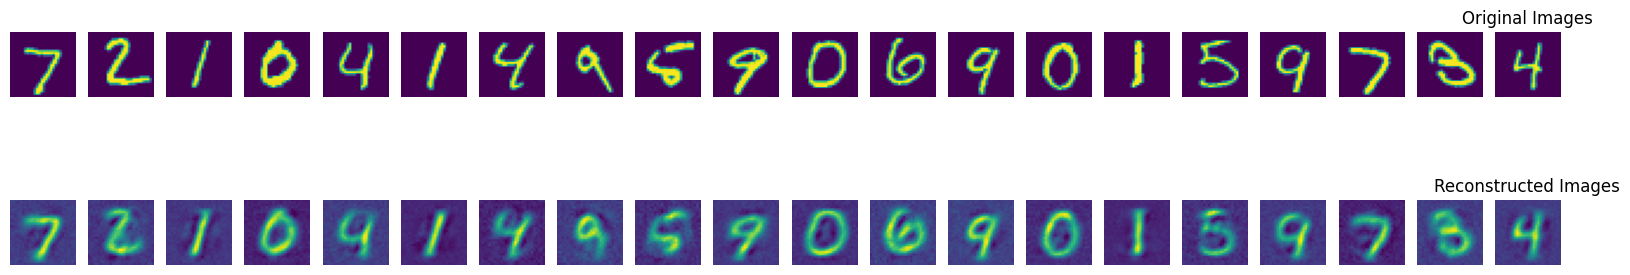

In [22]:
# Visualize the original and reconstructed images
visualize_original_reconstructed(naive_autoencoder_model, p2_naive_test_loader, num_images=20)

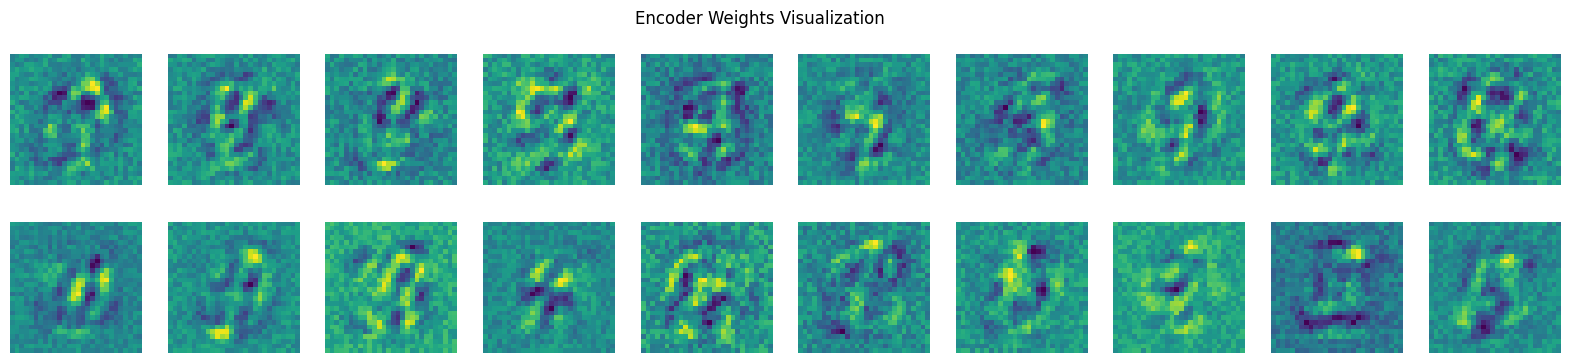

In [23]:
# Visualize the encoder weights representation
visualize_encoder_weights(naive_autoencoder_model, num_samples=20)

In [24]:
# Save the model
torch.save(naive_autoencoder_model.state_dict(), "naive_autoencoder.pth")

In [25]:
# Freeze the encoder weights
for param in naive_autoencoder_model.encoder.parameters():
    param.requires_grad = False

In [26]:
# Initialize the Classifier model with the trained autoencoder's encoder
naive_ae_classifier_model = Classifier(naive_autoencoder_model).to(device)

In [27]:
# Set up optimizer for the classifier (only train the output layer)
classifier_optimizer = optim.SGD(naive_ae_classifier_model.parameters(), lr=0.01)
classifier_criterion = nn.CrossEntropyLoss()

In [28]:
# Train Classifier
naive_ae_classifier_acc = train_classifier(naive_ae_classifier_model, p2_naive_train_loader, p2_naive_test_loader, naive_autoencoder_model, classifier_optimizer, classifier_criterion, device)

Epoch [10/200], Loss: 1489.5318, Test Accuracy: 89.09%
Epoch [20/200], Loss: 1480.9879, Test Accuracy: 89.16%
Epoch [30/200], Loss: 1477.0326, Test Accuracy: 89.38%
Epoch [40/200], Loss: 1474.5462, Test Accuracy: 89.41%
Epoch [50/200], Loss: 1472.6032, Test Accuracy: 89.44%
Epoch [60/200], Loss: 1471.0731, Test Accuracy: 89.22%
Epoch [70/200], Loss: 1469.8109, Test Accuracy: 89.38%
Epoch [80/200], Loss: 1468.7628, Test Accuracy: 89.32%
Epoch [90/200], Loss: 1467.8492, Test Accuracy: 89.24%
Epoch [100/200], Loss: 1466.8911, Test Accuracy: 89.24%
Epoch [110/200], Loss: 1466.2305, Test Accuracy: 89.16%
Epoch [120/200], Loss: 1465.5462, Test Accuracy: 89.06%
Epoch [130/200], Loss: 1464.8867, Test Accuracy: 89.09%
Epoch [140/200], Loss: 1464.3113, Test Accuracy: 88.99%
Epoch [150/200], Loss: 1463.7198, Test Accuracy: 88.97%
Epoch [160/200], Loss: 1463.2545, Test Accuracy: 88.94%
Epoch [170/200], Loss: 1462.7306, Test Accuracy: 88.97%
Epoch [180/200], Loss: 1462.2924, Test Accuracy: 88.79%
E

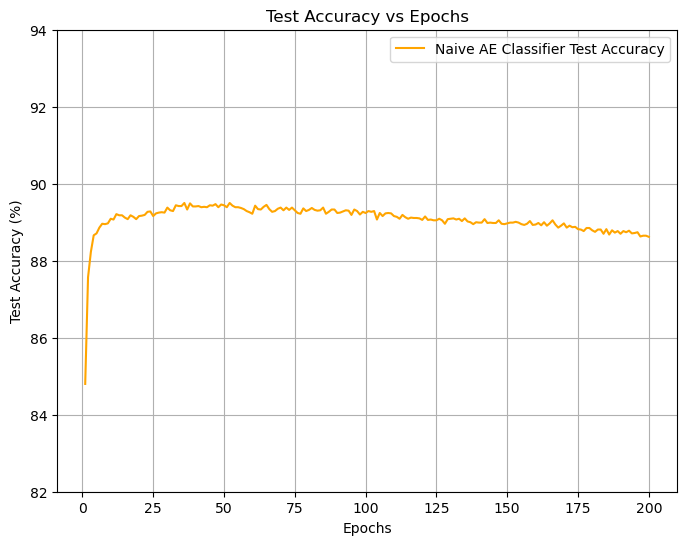

In [3]:
# Plot the test accuracy vs epochs for the classifier
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(naive_ae_classifier_acc) + 1), naive_ae_classifier_acc, label='Naive AE Classifier Test Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs Epochs')
plt.yticks([82, 84, 86, 88, 90, 92, 94])
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Save the model
torch.save(naive_ae_classifier_model.state_dict(), "naive_ae_classifier.pth")

In [31]:
# Specify the file name
file_name = "naive_ae_classifier_accuracy_values.txt"

# Open the file in write mode and save the accuracy values
with open(file_name, 'w') as file:
    for accuracy in naive_ae_classifier_acc:
        file.write(f"{accuracy}\n")

### **Sparse Autoencoder**

In [53]:
# Load MNIST dataset
p2_sparse_train_loader = train_loader
p2_sparse_test_loader = test_loader

In [54]:
# Define the Sparse Autoencoder Model
class SparseAutoencoder(nn.Module):
    def __init__(self, encoding_dim, rho=0.25):
        super(SparseAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, encoding_dim),
            nn.Sigmoid()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 784)
        )
        self.rho = rho  # Sparsity target

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

In [55]:
def train_sparse_autoencoder(model, train_loader, optimizer, criterion, device, num_epochs=200, rho=0.25, beta=2):
    model.to(device)
    losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, _ in train_loader:
            images = images.to(device)
            images = images.view(images.size(0), -1)  # Flatten the images to (batch_size, 784)

            optimizer.zero_grad()  # Reset gradients

            # Forward pass
            reconstructed, encoded = model(images)

            # Reconstruction loss (MSE)
            mse_loss = criterion(reconstructed, images)

            # KL Divergence loss for sparsity
            kl_loss = kl_divergence(rho, encoded)

            # Total loss
            loss = mse_loss + beta * kl_loss

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        average_loss = running_loss / len(train_loader)
        losses.append(average_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}')

    return losses

In [56]:
# KL divergence function
def kl_divergence(rho, rho_hat):
    rho_hat = torch.mean(rho_hat, dim=0)  # Average activation across the batch
    rho_hat = torch.clamp(rho_hat, min=1e-10, max=1 - 1e-10)
    rho = torch.tensor([rho] * len(rho_hat)).to(rho_hat.device)  # Sparsity parameter
    return torch.sum(rho * torch.log(rho / rho_hat) + (1 - rho) * torch.log((1 - rho) / (1 - rho_hat)))

In [80]:
# Define Classifier Model with frozen encoder weights
class SparseClassifier(nn.Module):
    def __init__(self, encoder):
        super(SparseClassifier, self).__init__()
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(encoder.encoder[0].out_features, 100)
        self.hidden.weight.data = encoder.encoder[0].weight.data.clone()  # Copy encoder weights
        self.hidden.bias.data.zero_()  # Set biases to zero
        self.hidden.requires_grad = False  # Freeze weights of the hidden layer
        self.output = nn.Linear(100, 10)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01) 

    def forward(self, x):
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.leaky_relu(x)
        x = torch.softmax(self.output(x), dim=1)
        return x

In [57]:
# Initialize the Sparse Autoencoder
sparse_autoencoder_model = SparseAutoencoder(encoding_dim=100, rho=0.1).to(device)

In [58]:
# Define the optimizer for the sparse autoencoder
sparse_autoencoder_optimizer = optim.SGD(sparse_autoencoder_model.parameters(), lr=0.4)
criterion = nn.MSELoss()

In [59]:
# Train the Sparse Autoencoder
sparse_ae_loss = train_sparse_autoencoder(
    sparse_autoencoder_model, 
    p2_sparse_train_loader, 
    sparse_autoencoder_optimizer, 
    criterion,  # Using MSE as reconstruction loss
    device,
    num_epochs=200, 
    rho=0.25, 
    beta=2  # Weight for KL divergence
)

Epoch [1/200], Loss: 7.6281
Epoch [2/200], Loss: 2.2938
Epoch [3/200], Loss: 2.1717
Epoch [4/200], Loss: 2.1946
Epoch [5/200], Loss: 2.1535
Epoch [6/200], Loss: 2.0822
Epoch [7/200], Loss: 2.0788
Epoch [8/200], Loss: 2.1236
Epoch [9/200], Loss: 2.0097
Epoch [10/200], Loss: 2.0426
Epoch [11/200], Loss: 2.0160
Epoch [12/200], Loss: 2.0240
Epoch [13/200], Loss: 1.9712
Epoch [14/200], Loss: 2.0258
Epoch [15/200], Loss: 1.9953
Epoch [16/200], Loss: 2.0217
Epoch [17/200], Loss: 1.9600
Epoch [18/200], Loss: 1.9701
Epoch [19/200], Loss: 1.9855
Epoch [20/200], Loss: 1.9587
Epoch [21/200], Loss: 1.9530
Epoch [22/200], Loss: 1.9302
Epoch [23/200], Loss: 1.9719
Epoch [24/200], Loss: 1.9320
Epoch [25/200], Loss: 1.9289
Epoch [26/200], Loss: 1.9689
Epoch [27/200], Loss: 1.9507
Epoch [28/200], Loss: 1.9343
Epoch [29/200], Loss: 1.9426
Epoch [30/200], Loss: 1.9452
Epoch [31/200], Loss: 1.9135
Epoch [32/200], Loss: 1.9436
Epoch [33/200], Loss: 1.9259
Epoch [34/200], Loss: 1.9588
Epoch [35/200], Loss: 1

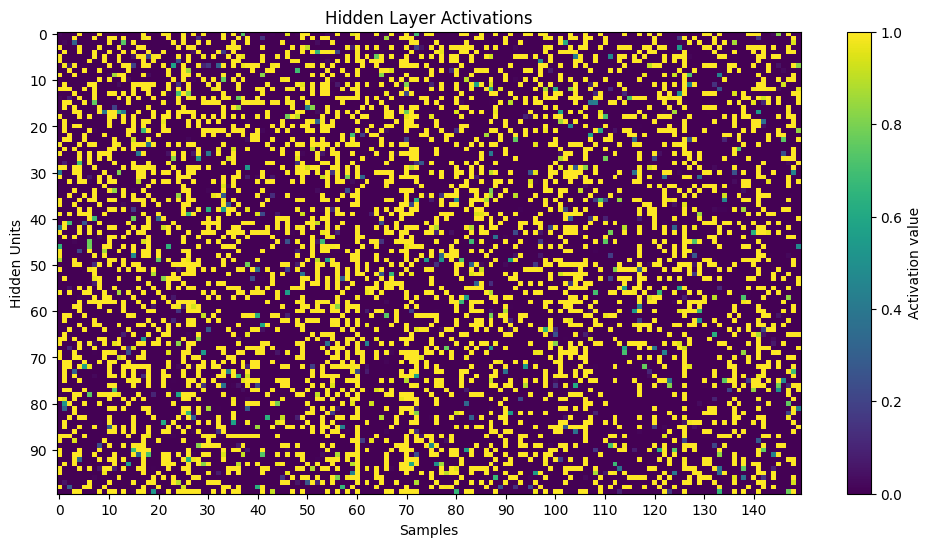

In [60]:
# Visualize the hidden layer activations from the autoencoder
visualize_hidden_activations(sparse_autoencoder_model, p2_sparse_test_loader, num_samples=150, num_units=100)

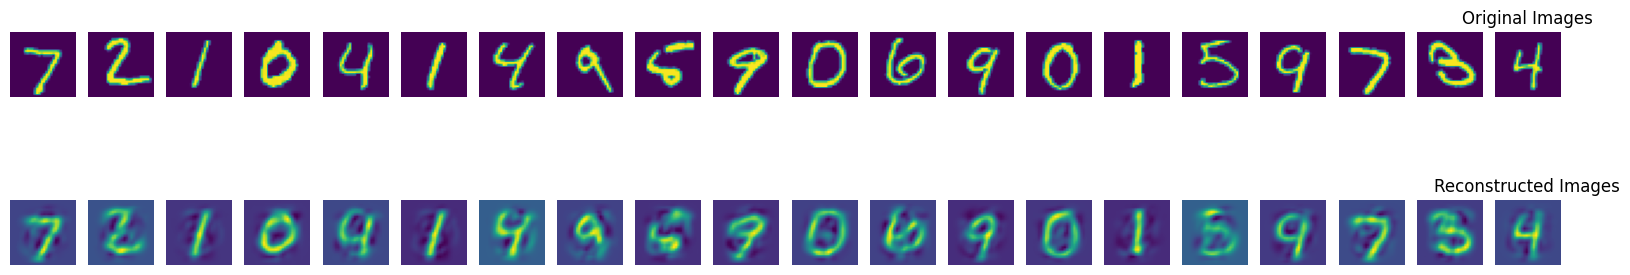

In [61]:
# Visualize the original and reconstructed images
visualize_original_reconstructed(sparse_autoencoder_model, p2_sparse_test_loader, num_images=20)

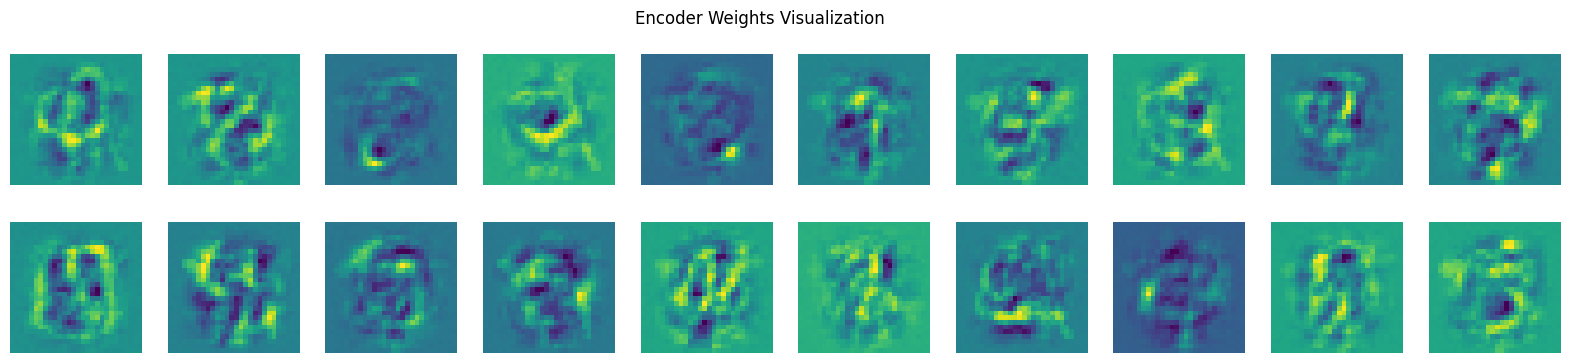

In [62]:
# Visualize the encoder weights representation
visualize_encoder_weights(sparse_autoencoder_model, num_samples=20)

In [63]:
# Save the trained model for future use
torch.save(sparse_autoencoder_model.state_dict(), "sparse_autoencoder.pth")

In [81]:
# Freeze the encoder weights after training the sparse autoencoder
for param in sparse_autoencoder_model.encoder.parameters():
    param.requires_grad = False

In [82]:
# Initialize the Classifier model with the trained sparse autoencoder's encoder
sparse_ae_classifier_model = SparseClassifier(sparse_autoencoder_model).to(device)

In [88]:
# Set up optimizer for the classifier (only train the output layer)
sparse_classifier_optimizer = optim.SGD(sparse_ae_classifier_model.parameters(), lr=0.01)
sparse_classifier_criterion = nn.CrossEntropyLoss()

In [89]:
# Train the classifier using the sparse autoencoder's encoded features
sparse_ae_classifier_acc = train_classifier(
    sparse_ae_classifier_model, 
    p2_sparse_train_loader, 
    p2_sparse_test_loader, 
    sparse_autoencoder_model,
    sparse_classifier_optimizer, 
    sparse_classifier_criterion, 
    device
)

Epoch [10/200], Loss: 1702.7369, Test Accuracy: 68.55%
Epoch [20/200], Loss: 1684.3052, Test Accuracy: 64.09%
Epoch [30/200], Loss: 1606.6982, Test Accuracy: 79.99%
Epoch [40/200], Loss: 1596.8166, Test Accuracy: 79.02%
Epoch [50/200], Loss: 1605.8801, Test Accuracy: 74.73%
Epoch [60/200], Loss: 1580.6015, Test Accuracy: 81.07%
Epoch [70/200], Loss: 1579.6061, Test Accuracy: 81.88%
Epoch [80/200], Loss: 1588.9585, Test Accuracy: 80.39%
Epoch [90/200], Loss: 1571.7460, Test Accuracy: 81.45%
Epoch [100/200], Loss: 1598.9123, Test Accuracy: 78.15%
Epoch [110/200], Loss: 1586.3476, Test Accuracy: 80.33%
Epoch [120/200], Loss: 1593.6810, Test Accuracy: 78.21%
Epoch [130/200], Loss: 1606.7430, Test Accuracy: 77.67%
Epoch [140/200], Loss: 1577.2382, Test Accuracy: 80.83%
Epoch [150/200], Loss: 1598.7511, Test Accuracy: 80.15%
Epoch [160/200], Loss: 1580.6072, Test Accuracy: 80.25%
Epoch [170/200], Loss: 1571.7983, Test Accuracy: 80.22%
Epoch [180/200], Loss: 1532.4903, Test Accuracy: 86.18%
E

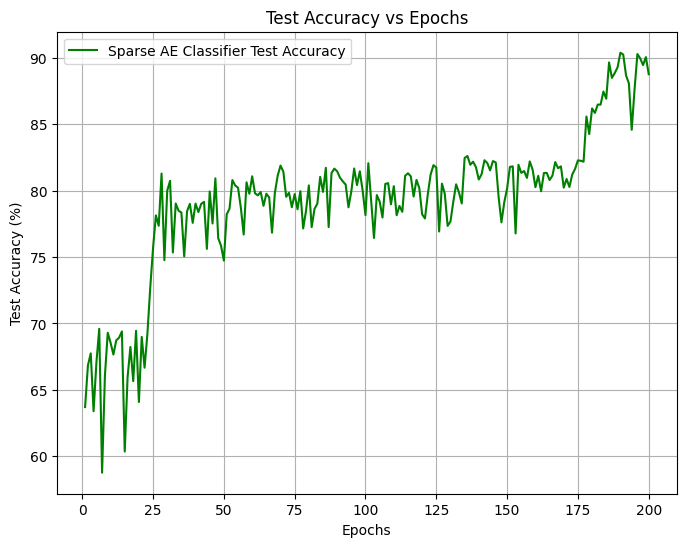

In [94]:
# Plot the test accuracy vs epochs for the classifier
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(sparse_ae_classifier_acc) + 1), sparse_ae_classifier_acc, label='Sparse AE Classifier Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
# Save the trained model for future use
torch.save(sparse_ae_classifier_model.state_dict(), "sparse_ae_classifier.pth")

In [130]:
# Specify the file name
file_name = "sparse_ae_classifier_accuracy_values.txt"

# Open the file in write mode and save the accuracy values
with open(file_name, 'w') as file:
    for accuracy in sparse_ae_classifier_acc:
        file.write(f"{accuracy}\n")

## **Comparison: No Feature vs Naive AE vs Sparse AE**

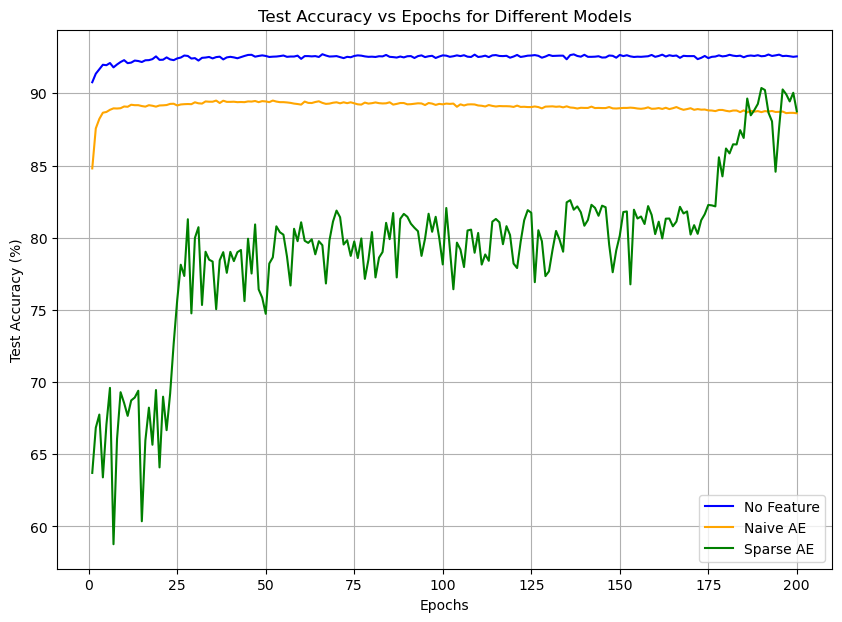

In [4]:
# Plot the test accuracy vs epochs for three models
plt.figure(figsize=(10, 7))

# Plot for non-regularized feedforward model (nf_test_accuracy)
plt.plot(range(1, len(nf_test_accuracy) + 1), nf_test_accuracy, label='No Feature', color='blue')

# Plot for naive autoencoder classifier (naive_ae_classifier_acc)
plt.plot(range(1, len(naive_ae_classifier_acc) + 1), naive_ae_classifier_acc, label='Naive AE', color='orange')

# Plot for sparse autoencoder classifier (sparse_ae_classifier_acc)
plt.plot(range(1, len(sparse_ae_classifier_acc) + 1), sparse_ae_classifier_acc, label='Sparse AE', color='green')

plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs Epochs for Different Models')
plt.legend()
plt.grid(True)
plt.show()

## **Problem-3: Shallow NN:**

In [120]:
# Set manual seed for reproducibility  
torch.manual_seed(42)

# Define ShallowNN model
class ShallowNN(nn.Module):
    def __init__(self):
        super(ShallowNN, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.activation = nn.SELU()  
        self.fc2 = nn.Linear(100, 10)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights and biases
        self.fc1.weight.data *= 0.001
        self.fc1.bias.data.fill_(0.0)
        self.fc2.weight.data *= 0.001
        self.fc2.bias.data.fill_(0.0)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        out = self.softmax(x)
        return out

In [121]:
# Set manual seed for reproducibility  
torch.manual_seed(42)

# Test function to evaluate the model on test data
def evaluate_model(model, test_loader, device):
    model.eval()
    total_samples = 0
    correct_predictions = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

    accuracy = 100 * correct_predictions / total_samples
    return accuracy

In [122]:
# Set manual seed for reproducibility  
torch.manual_seed(42)

# Train function to train the model on the training data
def train_model(model, train_loader, test_loader, optimizer, criterion, device, num_epochs=200):
    accuracy_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()  # Reset gradients

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Evaluate model after each epoch
        test_accuracy = evaluate_model(model, test_loader, device)
        accuracy_list.append(test_accuracy)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

    return accuracy_list

In [123]:
# Prepare MNIST dataset and data loaders
p3_train_loader = train_loader
p3_test_loader = test_loader

In [124]:
# Set manual seed for reproducibility  
torch.manual_seed(42)

# Model setup
shallow_nn_model = ShallowNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(shallow_nn_model.parameters(), lr=0.01)

In [125]:
# Train and evaluate the model
shallow_nn_accuracy = train_model(shallow_nn_model, p3_train_loader, p3_test_loader, optimizer, criterion, device)

Epoch [10/200], Loss: 1484.5238, Test Accuracy: 90.30%
Epoch [20/200], Loss: 1453.3644, Test Accuracy: 92.24%
Epoch [30/200], Loss: 1442.2891, Test Accuracy: 93.00%
Epoch [40/200], Loss: 1434.5695, Test Accuracy: 93.53%
Epoch [50/200], Loss: 1428.5030, Test Accuracy: 93.83%
Epoch [60/200], Loss: 1423.5872, Test Accuracy: 94.35%
Epoch [70/200], Loss: 1419.2961, Test Accuracy: 94.66%
Epoch [80/200], Loss: 1415.6977, Test Accuracy: 94.92%
Epoch [90/200], Loss: 1412.4631, Test Accuracy: 95.11%
Epoch [100/200], Loss: 1409.6494, Test Accuracy: 95.29%
Epoch [110/200], Loss: 1407.2001, Test Accuracy: 95.47%
Epoch [120/200], Loss: 1405.0071, Test Accuracy: 95.73%
Epoch [130/200], Loss: 1403.0971, Test Accuracy: 95.91%
Epoch [140/200], Loss: 1401.3101, Test Accuracy: 96.01%
Epoch [150/200], Loss: 1399.7674, Test Accuracy: 96.13%
Epoch [160/200], Loss: 1398.3257, Test Accuracy: 96.23%
Epoch [170/200], Loss: 1396.9813, Test Accuracy: 96.42%
Epoch [180/200], Loss: 1395.7402, Test Accuracy: 96.51%
E

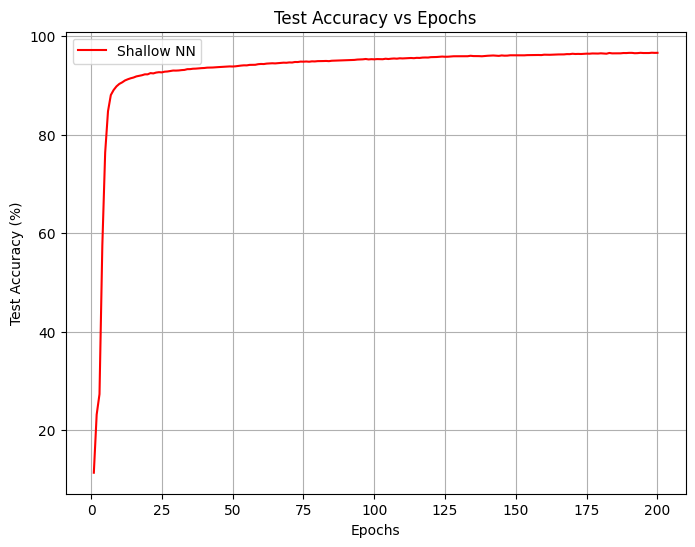

In [126]:
# Plot the test accuracy vs epochs
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(shallow_nn_accuracy) + 1), shallow_nn_accuracy, label='Shallow NN', color='r')
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
# Save the model state dictionary
torch.save(shallow_nn_model.state_dict(), 'shallow_nn_model.pth')

In [129]:
# Specify the file name
file_name = "shallow_nn_accuracy_values.txt"

# Open the file in write mode and save the accuracy values
with open(file_name, 'w') as file:
    for accuracy in shallow_nn_accuracy:
        file.write(f"{accuracy}\n")

## **Comparison: No Feature vs Naive AE vs Sparse AE vs Shallow NN**

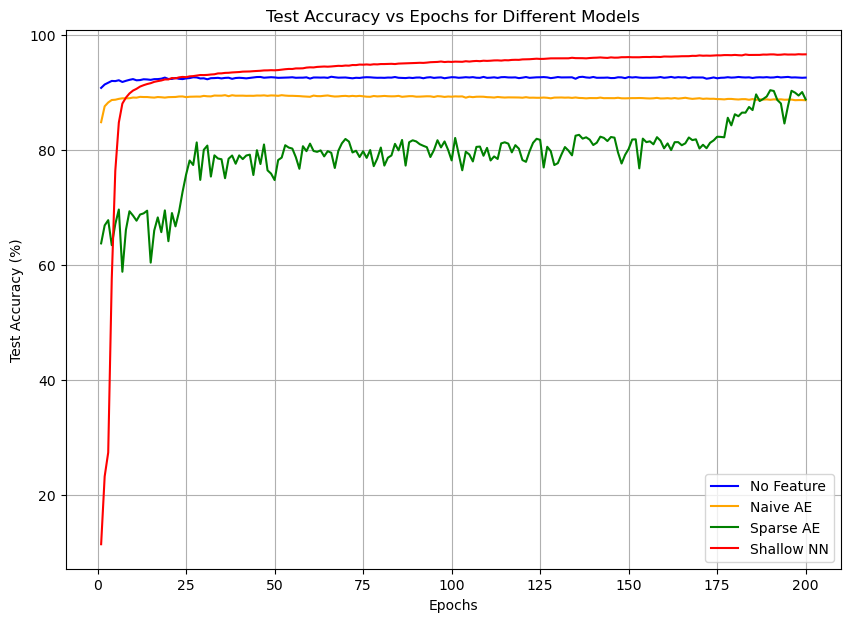

In [5]:
# Plot the test accuracy vs epochs for three models
plt.figure(figsize=(10, 7))

# Plot for non-regularized feedforward model (nf_test_accuracy)
plt.plot(range(1, len(nf_test_accuracy) + 1), nf_test_accuracy, label='No Feature', color='blue')

# Plot for naive autoencoder classifier (naive_ae_classifier_acc)
plt.plot(range(1, len(naive_ae_classifier_acc) + 1), naive_ae_classifier_acc, label='Naive AE', color='orange')

# Plot for sparse autoencoder classifier (sparse_ae_classifier_acc)
plt.plot(range(1, len(sparse_ae_classifier_acc) + 1), sparse_ae_classifier_acc, label='Sparse AE', color='green')

# Plot for shallow neural network classifier (shallow_nn_accuracy)
plt.plot(range(1, len(shallow_nn_accuracy) + 1), shallow_nn_accuracy, label='Shallow NN', color='red')

plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs Epochs for Different Models')
plt.legend()
plt.grid(True)
plt.show()

## **Problem-4: Full BP on the both layers**

In [32]:
for param in naive_autoencoder_model.parameters():
    param.requires_grad = False

for param in naive_autoencoder_model.encoder.parameters():
    param.requires_grad = True

In [33]:
naive_bn_optimizer = torch.optim.SGD(naive_autoencoder_model.encoder.parameters(), lr=0.1)
criterion = nn.MSELoss()
train_autoencoder(naive_autoencoder_model, p2_naive_train_loader, naive_bn_optimizer, criterion, device)

Epoch [10/200], Loss: 0.2314
Epoch [20/200], Loss: 0.2303
Epoch [30/200], Loss: 0.2297
Epoch [40/200], Loss: 0.2294
Epoch [50/200], Loss: 0.2291
Epoch [60/200], Loss: 0.2290
Epoch [70/200], Loss: 0.2288
Epoch [80/200], Loss: 0.2287
Epoch [90/200], Loss: 0.2286
Epoch [100/200], Loss: 0.2285
Epoch [110/200], Loss: 0.2285
Epoch [120/200], Loss: 0.2284
Epoch [130/200], Loss: 0.2283
Epoch [140/200], Loss: 0.2283
Epoch [150/200], Loss: 0.2283
Epoch [160/200], Loss: 0.2282
Epoch [170/200], Loss: 0.2282
Epoch [180/200], Loss: 0.2281
Epoch [190/200], Loss: 0.2281
Epoch [200/200], Loss: 0.2281


[0.23414593769797384,
 0.2335575420909853,
 0.23310110300207443,
 0.23273786525927118,
 0.23243061457869849,
 0.2321553051090444,
 0.23192498075174117,
 0.23169246854494885,
 0.23151297903836154,
 0.23135368694374556,
 0.23118521899048453,
 0.23103820154471183,
 0.23092644575880025,
 0.23080152179450114,
 0.23069966139633263,
 0.23060164543420775,
 0.23049908750918882,
 0.23041782868124527,
 0.2303440099014148,
 0.2302680876431689,
 0.23020781331987522,
 0.23012461376660415,
 0.23005496191063415,
 0.23000261357534668,
 0.22994609283549444,
 0.22988650612612524,
 0.2298525449182433,
 0.22978374512909827,
 0.22975146908686359,
 0.22972179115263383,
 0.22967347961816706,
 0.22963188758600495,
 0.2295855737761902,
 0.22955515901290025,
 0.22952957518065153,
 0.22948550879319848,
 0.2294583148094637,
 0.2294188335950949,
 0.2293955267492388,
 0.22936184980721872,
 0.22934231508388195,
 0.2293090594729889,
 0.2292967263633,
 0.2292600513171794,
 0.2292308783385037,
 0.2292159464853659,
 0.22

In [34]:
naive_ae_classifier_with_bn_model = Classifier(naive_autoencoder_model).to(device)
naive_ae_classifier_with_bn_optimzer = torch.optim.SGD(naive_ae_classifier_with_bn_model.parameters(), lr=0.2)
naive_ae_classifier_with_bn_acc = train_classifier(naive_ae_classifier_with_bn_model, p2_naive_train_loader, p2_naive_test_loader, naive_autoencoder_model, naive_ae_classifier_with_bn_optimzer, nn.CrossEntropyLoss(), device)

Epoch [10/200], Loss: 1469.6137, Test Accuracy: 89.43%
Epoch [20/200], Loss: 1466.1035, Test Accuracy: 89.53%
Epoch [30/200], Loss: 1463.8365, Test Accuracy: 89.43%
Epoch [40/200], Loss: 1463.3324, Test Accuracy: 89.96%
Epoch [50/200], Loss: 1461.9068, Test Accuracy: 89.57%
Epoch [60/200], Loss: 1461.7417, Test Accuracy: 89.80%
Epoch [70/200], Loss: 1459.7240, Test Accuracy: 89.58%
Epoch [80/200], Loss: 1458.6454, Test Accuracy: 88.92%
Epoch [90/200], Loss: 1459.5870, Test Accuracy: 89.13%
Epoch [100/200], Loss: 1459.9050, Test Accuracy: 89.05%
Epoch [110/200], Loss: 1459.1221, Test Accuracy: 89.72%
Epoch [120/200], Loss: 1458.0124, Test Accuracy: 89.28%
Epoch [130/200], Loss: 1458.2483, Test Accuracy: 89.35%
Epoch [140/200], Loss: 1458.4496, Test Accuracy: 89.26%
Epoch [150/200], Loss: 1457.8200, Test Accuracy: 88.97%
Epoch [160/200], Loss: 1457.6971, Test Accuracy: 88.93%
Epoch [170/200], Loss: 1457.5482, Test Accuracy: 89.51%
Epoch [180/200], Loss: 1457.7028, Test Accuracy: 88.65%
E

In [35]:
# Save the model state dictionary
torch.save(naive_ae_classifier_with_bn_model.state_dict(), 'naive_ae_classifier_with_bn_model.pth')

In [36]:
# Specify the file name
file_name = "naive_ae_classifier_with_bn_accuracy_values.txt"

# Open the file in write mode and save the accuracy values
with open(file_name, 'w') as file:
    for accuracy in naive_ae_classifier_with_bn_acc:
        file.write(f"{accuracy}\n")

In [95]:
for param in sparse_autoencoder_model.parameters():
    param.requires_grad = False

for param in sparse_autoencoder_model.encoder.parameters():
    param.requires_grad = True

In [96]:
sparse_bn_optimizer = torch.optim.SGD(sparse_autoencoder_model.encoder.parameters(), lr=0.1)
criterion = nn.MSELoss()
train_autoencoder(sparse_autoencoder_model, p2_sparse_train_loader, sparse_bn_optimizer, criterion, device)

Epoch [1/200], Loss: 0.2471
Epoch [2/200], Loss: 0.2468
Epoch [3/200], Loss: 0.2465
Epoch [4/200], Loss: 0.2463
Epoch [5/200], Loss: 0.2460
Epoch [6/200], Loss: 0.2458
Epoch [7/200], Loss: 0.2456
Epoch [8/200], Loss: 0.2454
Epoch [9/200], Loss: 0.2452
Epoch [10/200], Loss: 0.2451
Epoch [11/200], Loss: 0.2449
Epoch [12/200], Loss: 0.2447
Epoch [13/200], Loss: 0.2446
Epoch [14/200], Loss: 0.2444
Epoch [15/200], Loss: 0.2443
Epoch [16/200], Loss: 0.2442
Epoch [17/200], Loss: 0.2441
Epoch [18/200], Loss: 0.2439
Epoch [19/200], Loss: 0.2438
Epoch [20/200], Loss: 0.2437
Epoch [21/200], Loss: 0.2436
Epoch [22/200], Loss: 0.2434
Epoch [23/200], Loss: 0.2433
Epoch [24/200], Loss: 0.2432
Epoch [25/200], Loss: 0.2431
Epoch [26/200], Loss: 0.2430
Epoch [27/200], Loss: 0.2429
Epoch [28/200], Loss: 0.2428
Epoch [29/200], Loss: 0.2427
Epoch [30/200], Loss: 0.2426
Epoch [31/200], Loss: 0.2425
Epoch [32/200], Loss: 0.2425
Epoch [33/200], Loss: 0.2423
Epoch [34/200], Loss: 0.2423
Epoch [35/200], Loss: 0

[0.24708453343430561,
 0.2467959471094583,
 0.24650196003507197,
 0.24626514784245093,
 0.2460101274157892,
 0.24579511503420914,
 0.24558902428602614,
 0.24540230557163642,
 0.24524061400880184,
 0.245064800704466,
 0.24489595394716587,
 0.24474666135778814,
 0.2445884152992702,
 0.24444982550863517,
 0.2443212552079514,
 0.244181359818241,
 0.2440516678000818,
 0.24392328006245179,
 0.24379663842954616,
 0.24368277695705134,
 0.24358671509634966,
 0.24344210367975458,
 0.24334423914392875,
 0.24324749221107853,
 0.24314470400116336,
 0.24302310854005915,
 0.24292580448170462,
 0.24282952264618518,
 0.24272418614707267,
 0.24263481203236306,
 0.24254137582616256,
 0.24245499052218536,
 0.2423448544035334,
 0.24227704582755755,
 0.24218104498536347,
 0.24209040676606997,
 0.24201736581732214,
 0.24191187746298592,
 0.2418324916379284,
 0.24175179934006003,
 0.2416652665336503,
 0.24158936256030475,
 0.2415121113821896,
 0.2414194048880768,
 0.24136551679260948,
 0.2412683516581938,
 0.

In [131]:
sparse_ae_classifier_with_bn_model = SparseClassifier(sparse_autoencoder_model).to(device)
sparse_ae_classifier_with_bn_optimzer = torch.optim.SGD(sparse_ae_classifier_with_bn_model.parameters(), lr=0.2)
sparse_ae_classifier_with_bn_acc = train_classifier(sparse_ae_classifier_with_bn_model, p2_sparse_train_loader, p2_sparse_test_loader, sparse_autoencoder_model, sparse_ae_classifier_with_bn_optimzer, nn.CrossEntropyLoss(), device)

Epoch [10/200], Loss: 1465.9291, Test Accuracy: 91.37%
Epoch [20/200], Loss: 1456.8023, Test Accuracy: 91.50%
Epoch [30/200], Loss: 1450.6257, Test Accuracy: 92.66%
Epoch [40/200], Loss: 1445.1136, Test Accuracy: 92.70%
Epoch [50/200], Loss: 1441.3249, Test Accuracy: 93.33%
Epoch [60/200], Loss: 1437.6665, Test Accuracy: 93.58%
Epoch [70/200], Loss: 1434.4166, Test Accuracy: 93.69%
Epoch [80/200], Loss: 1432.3597, Test Accuracy: 93.89%
Epoch [90/200], Loss: 1428.7100, Test Accuracy: 93.87%
Epoch [100/200], Loss: 1426.2794, Test Accuracy: 94.20%
Epoch [110/200], Loss: 1425.4742, Test Accuracy: 93.97%
Epoch [120/200], Loss: 1424.0654, Test Accuracy: 94.31%
Epoch [130/200], Loss: 1423.5618, Test Accuracy: 94.30%
Epoch [140/200], Loss: 1420.6051, Test Accuracy: 94.41%
Epoch [150/200], Loss: 1418.8553, Test Accuracy: 94.43%
Epoch [160/200], Loss: 1418.0321, Test Accuracy: 94.69%
Epoch [170/200], Loss: 1417.7418, Test Accuracy: 94.50%
Epoch [180/200], Loss: 1416.5337, Test Accuracy: 94.69%
E

In [139]:
# Save the model state dictionary
torch.save(sparse_ae_classifier_with_bn_model.state_dict(), 'sparse_ae_classifier_with_bn_model.pth')

In [132]:
# Specify the file name
file_name = "sparse_ae_classifier_with_bn_accuracy_values.txt"

# Open the file in write mode and save the accuracy values
with open(file_name, 'w') as file:
    for accuracy in sparse_ae_classifier_with_bn_acc:
        file.write(f"{accuracy}\n")

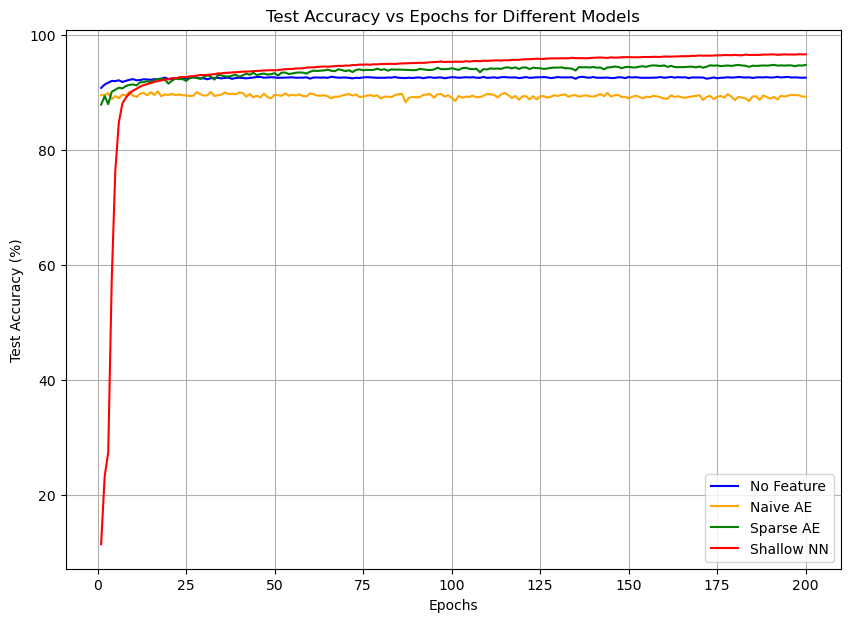

In [6]:
# Plot the test accuracy vs epochs for three models
plt.figure(figsize=(10, 7))

# Plot for non-regularized feedforward model (nf_test_accuracy)
plt.plot(range(1, len(nf_test_accuracy) + 1), nf_test_accuracy, label='No Feature', color='blue')

# Plot for naive autoencoder classifier with bn (naive_ae_classifier_with_bn_acc)
plt.plot(range(1, len(naive_ae_classifier_with_bn_acc) + 1), naive_ae_classifier_with_bn_acc, label='Naive AE', color='orange')

# Plot for sparse autoencoder classifier with bn (sparse_ae_classifier_with_bn_acc)
plt.plot(range(1, len(sparse_ae_classifier_with_bn_acc) + 1), sparse_ae_classifier_with_bn_acc, label='Sparse AE', color='green')

# Plot for shallow neural network classifier (shallow_nn_accuracy)
plt.plot(range(1, len(shallow_nn_accuracy) + 1), shallow_nn_accuracy, label='Shallow NN', color='red')

plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs Epochs for Different Models')
plt.legend()
plt.grid(True)
plt.show()

### **Part-2**

In [100]:
# Define the fully connected network with five hidden layers
class FullyConnectedNet(nn.Module):
    def __init__(self, activation_fn, initializer):
        super(FullyConnectedNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc5 = nn.Linear(512, 512)
        self.fc6 = nn.Linear(512, 10)
        
        # Apply weight initialization
        initializer(self.fc1.weight)
        initializer(self.fc2.weight)
        initializer(self.fc3.weight)
        initializer(self.fc4.weight)
        initializer(self.fc5.weight)
        initializer(self.fc6.weight)
        
        self.activation_fn = activation_fn

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.activation_fn(self.fc1(x))
        x = self.activation_fn(self.fc2(x))
        x = self.activation_fn(self.fc3(x))
        x = self.activation_fn(self.fc4(x))
        x = self.activation_fn(self.fc5(x))
        x = self.fc6(x)  # No activation for the output layer
        return x

In [101]:
# Set up training and testing loops
def train(model, device, train_loader, optimizer, criterion):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

In [102]:
def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, accuracy

In [103]:
# Function to initialize and train different models
def run_experiment(activation_fn, initializer, device, train_loader, test_loader, epochs=50):
    model = FullyConnectedNet(activation_fn, initializer).to(device)
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    criterion = nn.CrossEntropyLoss()
    
    accuracies = []
    
    for epoch in range(1, epochs + 1):
        train(model, device, train_loader, optimizer, criterion)
        test_loss, accuracy = test(model, device, test_loader, criterion)
        accuracies.append(accuracy)
        
        if (epoch + 1) % 10 == 0: 
            print(f'Epoch [{epoch+1}/{epochs}], Test Accuracy: {accuracy:.2f}%')
    
    return accuracies

In [104]:
# Store accuracies for each setup
accuracies_dict = {}

In [105]:
print("Setup 1: Sigmoid + Normal(0, 0.01)")
accuracies_dict['Sigmoid + Normal(0, 0.01)'] = run_experiment(nn.Sigmoid(), lambda x: nn.init.normal_(x, mean=0, std=0.01), device, train_loader, test_loader)

Setup 1: Sigmoid + Normal(0, 0.01)
Epoch [10/50], Test Accuracy: 11.35%
Epoch [20/50], Test Accuracy: 11.35%
Epoch [30/50], Test Accuracy: 11.35%
Epoch [40/50], Test Accuracy: 11.35%
Epoch [50/50], Test Accuracy: 11.35%


In [106]:
print("Setup 2: Sigmoid + Xavier")
accuracies_dict['Sigmoid + Xavier'] = run_experiment(nn.Sigmoid(), nn.init.xavier_uniform_, device, train_loader, test_loader)

Setup 2: Sigmoid + Xavier
Epoch [10/50], Test Accuracy: 94.17%
Epoch [20/50], Test Accuracy: 96.98%
Epoch [30/50], Test Accuracy: 97.24%
Epoch [40/50], Test Accuracy: 97.35%
Epoch [50/50], Test Accuracy: 97.36%


In [108]:
print("Setup 3: ReLU + Normal(0, 0.01)")
accuracies_dict['ReLU + Normal(0, 0.01)'] = run_experiment(nn.ReLU(), lambda x: nn.init.normal_(x, mean=0, std=0.01), device, train_loader, test_loader)

Setup 3: ReLU + Normal(0, 0.01)
Epoch [10/50], Test Accuracy: 96.80%
Epoch [20/50], Test Accuracy: 97.64%
Epoch [30/50], Test Accuracy: 97.90%
Epoch [40/50], Test Accuracy: 98.03%
Epoch [50/50], Test Accuracy: 98.05%


In [109]:
print("Setup 4: ReLU + Xavier")
accuracies_dict['ReLU + Xavier'] = run_experiment(nn.ReLU(), nn.init.xavier_uniform_, device, train_loader, test_loader)

Setup 4: ReLU + Xavier
Epoch [10/50], Test Accuracy: 95.33%
Epoch [20/50], Test Accuracy: 98.44%
Epoch [30/50], Test Accuracy: 98.46%
Epoch [40/50], Test Accuracy: 98.47%
Epoch [50/50], Test Accuracy: 98.49%


In [110]:
print("Setup 5: ReLU + Kaiming He")
accuracies_dict['ReLU + Kaiming He'] = run_experiment(nn.ReLU(), nn.init.kaiming_uniform_, device, train_loader, test_loader)

Setup 5: ReLU + Kaiming He
Epoch [10/50], Test Accuracy: 97.84%
Epoch [20/50], Test Accuracy: 98.33%
Epoch [30/50], Test Accuracy: 98.32%
Epoch [40/50], Test Accuracy: 98.33%
Epoch [50/50], Test Accuracy: 98.33%


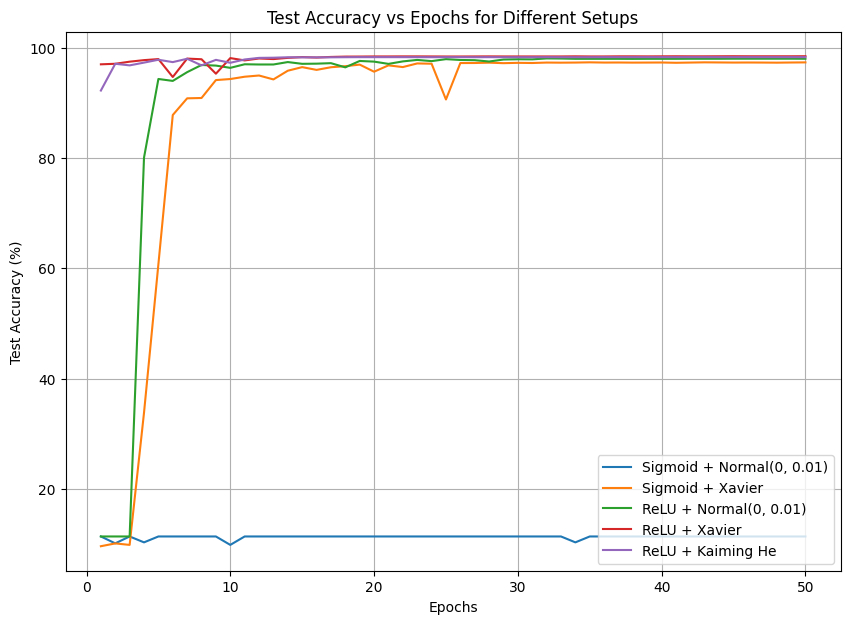

In [111]:
# Plot the accuracy vs epochs curve for each setup
plt.figure(figsize=(10, 7))
for label, accuracies in accuracies_dict.items():
    plt.plot(range(1, 51), accuracies, label=label)

plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs Epochs for Different Setups')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [112]:
# Define the fully connected network with five hidden layers and Batch Normalization
class FullyConnectedNetWithBN(nn.Module):
    def __init__(self, activation_fn, initializer):
        super(FullyConnectedNetWithBN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 512)
        self.bn3 = nn.BatchNorm1d(512)
        self.fc4 = nn.Linear(512, 512)
        self.bn4 = nn.BatchNorm1d(512)
        self.fc5 = nn.Linear(512, 512)
        self.bn5 = nn.BatchNorm1d(512)
        self.fc6 = nn.Linear(512, 10)

        # Apply weight initialization
        initializer(self.fc1.weight)
        initializer(self.fc2.weight)
        initializer(self.fc3.weight)
        initializer(self.fc4.weight)
        initializer(self.fc5.weight)
        initializer(self.fc6.weight)

        self.activation_fn = activation_fn

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.activation_fn(self.bn1(self.fc1(x)))  
        x = self.activation_fn(self.bn2(self.fc2(x)))  
        x = self.activation_fn(self.bn3(self.fc3(x))) 
        x = self.activation_fn(self.bn4(self.fc4(x)))  
        x = self.activation_fn(self.bn5(self.fc5(x)))  
        x = self.fc6(x)
        return x

In [113]:
# Store accuracies for each setup with batch normalization
accuracies_bn_dict = {}

In [114]:
# Setup 1: Sigmoid + Normal(0, 0.01)
print("Setup 1: Sigmoid + Normal(0, 0.01) with Batch Norm")
accuracies_bn_dict['Sigmoid + Normal(0, 0.01)'] = run_experiment(
    nn.Sigmoid(),
    lambda x: nn.init.normal_(x, mean=0, std=0.01),
    device,
    train_loader,
    test_loader
)

Setup 1: Sigmoid + Normal(0, 0.01) with Batch Norm
Epoch [10/50], Test Accuracy: 11.35%
Epoch [20/50], Test Accuracy: 11.35%
Epoch [30/50], Test Accuracy: 11.35%
Epoch [40/50], Test Accuracy: 11.35%
Epoch [50/50], Test Accuracy: 11.35%


In [115]:
# Setup 2: Sigmoid + Xavier
print("Setup 2: Sigmoid + Xavier with Batch Norm")
accuracies_bn_dict['Sigmoid + Xavier'] = run_experiment(
    nn.Sigmoid(),
    nn.init.xavier_uniform_,
    device,
    train_loader,
    test_loader
)

Setup 2: Sigmoid + Xavier with Batch Norm
Epoch [10/50], Test Accuracy: 93.37%
Epoch [20/50], Test Accuracy: 96.79%
Epoch [30/50], Test Accuracy: 97.19%
Epoch [40/50], Test Accuracy: 97.42%
Epoch [50/50], Test Accuracy: 97.42%


In [116]:
# Setup 3: ReLU + Normal(0, 0.01)
print("Setup 3: ReLU + Normal(0, 0.01) with Batch Norm")
accuracies_bn_dict['ReLU + Normal(0, 0.01)'] = run_experiment(
    nn.ReLU(),
    lambda x: nn.init.normal_(x, mean=0, std=0.01),
    device,
    train_loader,
    test_loader
)

Setup 3: ReLU + Normal(0, 0.01) with Batch Norm
Epoch [10/50], Test Accuracy: 96.91%
Epoch [20/50], Test Accuracy: 97.63%
Epoch [30/50], Test Accuracy: 97.95%
Epoch [40/50], Test Accuracy: 98.16%
Epoch [50/50], Test Accuracy: 98.19%


In [117]:
# Setup 4: ReLU + Xavier
print("Setup 4: ReLU + Xavier with Batch Norm")
accuracies_bn_dict['ReLU + Xavier'] = run_experiment(
    nn.ReLU(),
    nn.init.xavier_uniform_,
    device,
    train_loader,
    test_loader
)

Setup 4: ReLU + Xavier with Batch Norm
Epoch [10/50], Test Accuracy: 97.92%
Epoch [20/50], Test Accuracy: 98.40%
Epoch [30/50], Test Accuracy: 98.40%
Epoch [40/50], Test Accuracy: 98.40%
Epoch [50/50], Test Accuracy: 98.41%


In [118]:
# Setup 5: ReLU + Kaiming He
print("Setup 5: ReLU + Kaiming He with Batch Norm")
accuracies_bn_dict['ReLU + Kaiming He'] = run_experiment(
    nn.ReLU(),
    nn.init.kaiming_uniform_,
    device,
    train_loader,
    test_loader
)

Setup 5: ReLU + Kaiming He with Batch Norm
Epoch [10/50], Test Accuracy: 97.85%
Epoch [20/50], Test Accuracy: 98.38%
Epoch [30/50], Test Accuracy: 98.38%
Epoch [40/50], Test Accuracy: 98.40%
Epoch [50/50], Test Accuracy: 98.41%


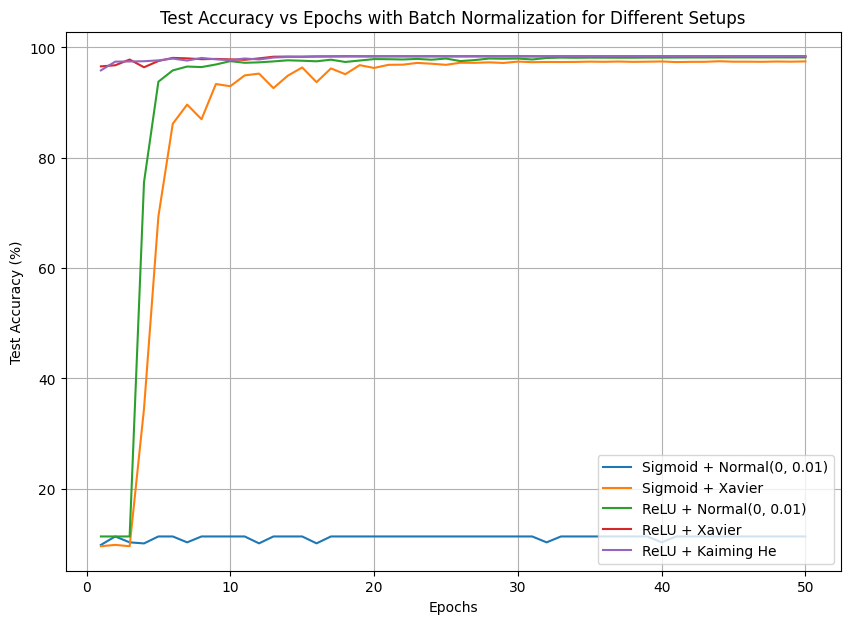

In [119]:
# Plot the accuracy vs epochs curve for each setup with Batch Normalization
plt.figure(figsize=(10, 7))
for label, accuracies in accuracies_bn_dict.items():
    plt.plot(range(1, 51), accuracies, label=label)

plt.xlabel('Epochs')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs Epochs with Batch Normalization for Different Setups')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()